In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

weather = pd.read_csv("weather_data.csv", index_col="DATE")

In [2]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
DATE,,,,,,,,
2020-01-01,USC00327027,"PETERSBURG 2 N, ND US",0.00,NaN,NaN,28.0,2.0,28.0
2020-01-02,USC00327027,"PETERSBURG 2 N, ND US",0.00,NaN,NaN,32.0,25.0,27.0
2020-01-03,USC00327027,"PETERSBURG 2 N, ND US",0.00,NaN,NaN,27.0,18.0,20.0
2020-01-04,USC00327027,"PETERSBURG 2 N, ND US",0.00,NaN,NaN,19.0,7.0,15.0
2020-01-05,USC00327027,"PETERSBURG 2 N, ND US",0.00,NaN,NaN,35.0,15.0,22.0
...,...,...,...,...,...,...,...,...
2023-06-02,USC00327027,"PETERSBURG 2 N, ND US",0.00,NaN,NaN,89.0,62.0,74.0
2023-06-03,USC00327027,"PETERSBURG 2 N, ND US",0.77,NaN,NaN,89.0,67.0,77.0
2023-06-06,USC00327027,"PETERSBURG 2 N, ND US",0.02,NaN,NaN,86.0,67.0,74.0


In [3]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.000880
SNOW       0.928697
SNWD       0.999120
TMAX       0.001761
TMIN       0.001761
TOBS       0.014085
dtype: float64

In [4]:
main_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
main_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [5]:
main_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2020-01-01,0.00,NaN,NaN,28.0,2.0
2020-01-02,0.00,NaN,NaN,32.0,25.0
2020-01-03,0.00,NaN,NaN,27.0,18.0
2020-01-04,0.00,NaN,NaN,19.0,7.0
2020-01-05,0.00,NaN,NaN,35.0,15.0
...,...,...,...,...,...
2023-06-02,0.00,NaN,NaN,89.0,62.0
2023-06-03,0.77,NaN,NaN,89.0,67.0
2023-06-06,0.02,NaN,NaN,86.0,67.0


In [6]:
main_weather.apply(pd.isnull).sum()/main_weather.shape[0]

precip        0.000880
snow          0.928697
snow_depth    0.999120
temp_max      0.001761
temp_min      0.001761
dtype: float64

In [7]:
main_weather["snow"].value_counts()

1.0     22
2.0     13
3.0      7
1.5      5
2.5      5
0.5      4
3.5      3
0.0      3
4.0      2
7.0      2
12.0     2
0.2      2
9.0      1
14.0     1
1.2      1
11.0     1
7.3      1
0.3      1
8.0      1
5.2      1
0.4      1
5.0      1
10.0     1
Name: snow, dtype: int64

In [11]:
del main_weather["snow"]

In [9]:
main_weather["snow_depth"].value_counts()

15.0    1
Name: snow_depth, dtype: int64

In [10]:
del main_weather["snow_depth"]

In [12]:
main_weather[pd.isnull(main_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
2023-05-16,NaN,NaN,NaN


In [13]:
main_weather.loc["2023-05-10":"2023-05-20",:]

,precip,temp_max,temp_min
DATE,,,
2023-05-10,0.00,70.0,47.0
2023-05-11,0.00,78.0,53.0
2023-05-12,0.00,80.0,55.0
2023-05-13,0.00,79.0,56.0
2023-05-16,NaN,NaN,NaN
2023-05-17,0.00,78.0,53.0
2023-05-18,0.08,82.0,43.0
2023-05-19,0.32,57.0,39.0


In [17]:
main_weather["precip"].value_counts()

0.00    910
0.02     19
0.06     15
0.05     13
0.03     10
       ... 
0.62      1
1.70      1
1.35      1
0.36      1
0.29      1
Name: precip, Length: 75, dtype: int64

In [18]:
main_weather["precip"] = main_weather["precip"].fillna(0)

In [19]:
main_weather[pd.isnull(main_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2022-02-23,0.35,NaN,NaN
2023-05-16,0.00,NaN,NaN


In [245]:
main_weather.loc["2023-02-18":"2023-02-25",:]

,precip,temp_max,temp_min,forecast_temp max,target_temp max,month_max,month_day_max,min_max,max_min,monthly_avg,day_of_year_avg,month_day_max1,max_min1
DATE,,,,,,,,,,,,,
2023-02-22,0.0,4.0,-15.0,-8.0,-8.0,11.500000,2.875000,-0.266667,-0.266667,16.000000,4.0,2.875000,-0.266667
2023-02-23,0.0,-8.0,-14.0,-6.0,-6.0,11.333333,-1.416667,0.571429,0.571429,14.000000,-6.0,-1.416667,0.571429
2023-02-24,0.0,-6.0,-27.0,-3.0,-3.0,11.400000,-1.900000,0.222222,0.222222,12.461538,17.0,-1.900000,0.222222
2023-02-25,0.0,-3.0,-15.0,13.0,13.0,11.733333,-3.911111,0.200000,0.200000,11.357143,12.5,-3.911111,0.200000


In [20]:
main_weather = main_weather.fillna(method="ffill")

In [21]:
main_weather.apply(pd.isnull).sum()/main_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [22]:
main_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [24]:
main_weather.index

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2023-05-18', '2023-05-19', '2023-05-30', '2023-05-31', '2023-06-01',
       '2023-06-02', '2023-06-03', '2023-06-06', '2023-06-07', '2023-06-08'],
      dtype='object', name='DATE', length=1136)

In [25]:
main_weather.index = pd.to_datetime(main_weather.index)

In [26]:
main_weather.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-05-18', '2023-05-19', '2023-05-30', '2023-05-31',
               '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-06',
               '2023-06-07', '2023-06-08'],
              dtype='datetime64[ns]', name='DATE', length=1136, freq=None)

In [27]:
main_weather.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=1136)

In [29]:
main_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

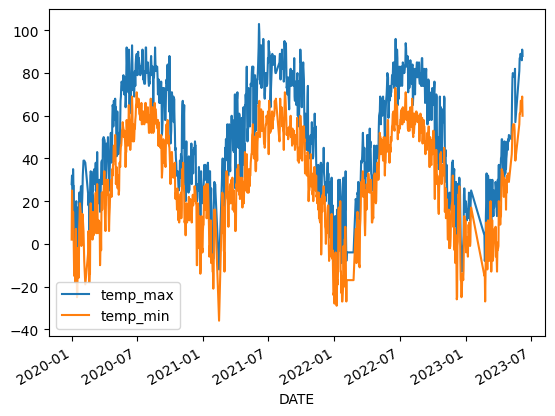

In [33]:
main_weather[["temp_max", "temp_min"]].plot()

In [37]:
main_weather.index.year.value_counts().sort_index()

2020    354
2021    338
2022    342
2023    102
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

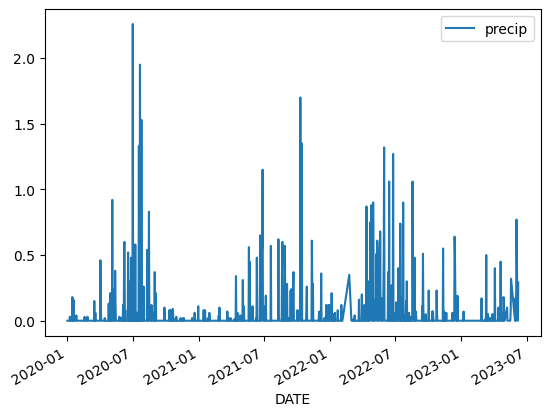

In [38]:
main_weather[["precip"]].plot()

In [52]:
main_weather["target_temp max"] = main_weather.shift(-1)["temp_max"]

In [53]:
main_weather

,precip,temp_max,temp_min,forecast_temp max,target_temp max
DATE,,,,,
2020-01-01,0.00,28.0,2.0,32.0,32.0
2020-01-02,0.00,32.0,25.0,27.0,27.0
2020-01-03,0.00,27.0,18.0,19.0,19.0
2020-01-04,0.00,19.0,7.0,35.0,35.0
2020-01-05,0.00,35.0,15.0,27.0,27.0
...,...,...,...,...,...
2023-06-01,0.00,87.0,61.0,89.0,89.0
2023-06-02,0.00,89.0,62.0,89.0,89.0
2023-06-03,0.77,89.0,67.0,86.0,86.0


In [54]:
main_weather = main_weather.iloc[:-1,:].copy()

In [55]:
main_weather

,precip,temp_max,temp_min,forecast_temp max,target_temp max
DATE,,,,,
2020-01-01,0.00,28.0,2.0,32.0,32.0
2020-01-02,0.00,32.0,25.0,27.0,27.0
2020-01-03,0.00,27.0,18.0,19.0,19.0
2020-01-04,0.00,19.0,7.0,35.0,35.0
2020-01-05,0.00,35.0,15.0,27.0,27.0
...,...,...,...,...,...
2023-05-31,0.17,87.0,61.0,87.0,87.0
2023-06-01,0.00,87.0,61.0,89.0,89.0
2023-06-02,0.00,89.0,62.0,89.0,89.0


In [56]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [70]:
factors = ["precip", "temp_max", "temp_min"]

In [58]:
train = main_weather.loc[:"2022-12-31"]

In [59]:
test = main_weather.loc["2023-01-01":]

In [71]:
reg.fit(train[factors], train["target_temp max"])

Ridge(alpha=0.1)

In [73]:
predictions = reg.predict(test[factors])

In [62]:
from sklearn.metrics import mean_absolute_error

In [74]:
mean_absolute_error(test["target_temp max"], predictions)

6.02418900508108

In [75]:
combined = pd.concat([test["target_temp max"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [76]:
combined

,actual,predictions
DATE,,
2023-01-01,19.0,21.976960
2023-01-02,16.0,18.397046
2023-01-03,11.0,17.545617
2023-01-04,13.0,14.693479
2023-01-05,13.0,17.983967
...,...,...
2023-05-31,87.0,84.109536
2023-06-01,89.0,85.131353
2023-06-02,89.0,86.702135


<AxesSubplot:xlabel='DATE'>

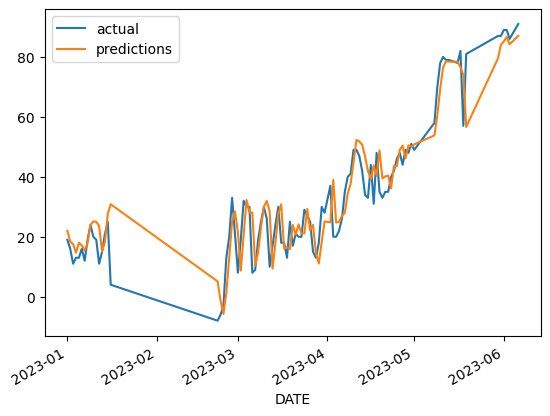

In [77]:
combined.plot()

In [68]:
reg.coef_

array([-6.01068763,  0.57042756,  0.42992665])

In [199]:
main_weather["month_max"] = main_weather["temp_max"].rolling(30).mean()

In [200]:
main_weather["month_day_max"] = main_weather["month_max"] / main_weather["temp_max"]

In [207]:
main_weather["month_day_max1"] = main_weather["month_day_max"]

# Calculate the mean of the column excluding infinite values
mean1 = np.mean(month_day_max1[np.isfinite(month_day_max1)])

# Identify the indices of infinite values
inf_indices = np.isinf(month_day_max1)

# Replace infinite values with the mean
month_day_max1[inf_indices] = mean1

# Print the updated column
print(month_day_max1)


DATE
2020-11-08         NaN
2020-11-09         NaN
2020-11-10         NaN
2020-11-11         NaN
2020-11-12         NaN
                ...   
2023-05-31    0.619157
2023-06-01    0.636398
2023-06-02    0.642697
2023-06-03    0.663670
2023-06-06    0.703101
Name: month_day_max, Length: 834, dtype: float64


In [215]:
main_weather["max_min"] = main_weather["temp_max"] / main_weather["temp_min"]

In [218]:
main_weather["max_min1"] = main_weather["max_min"]

# Calculate the mean of the column excluding infinite values
mean2 = np.mean(main_weather["max_min1"][np.isfinite(main_weather["max_min1"])])

# Identify the indices of infinite values
inf_indices = np.isinf(main_weather["max_min1"])

# Replace infinite values with the mean
main_weather["max_min1"][inf_indices] = mean2

# Print the updated column
print(main_weather["max_min1"])


DATE
2021-01-07    2.312500
2021-01-08    1.375000
2021-01-09    1.142857
2021-01-10    2.583333
2021-01-11    2.500000
                ...   
2023-05-31    1.426230
2023-06-01    1.426230
2023-06-02    1.435484
2023-06-03    1.328358
2023-06-06    1.283582
Name: max_min1, Length: 774, dtype: float64


In [219]:
main_weather = main_weather.iloc[30:,:].copy()

In [220]:
factors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max1", "max_min1"]

In [221]:
def create_predictions(factors, main_weather, reg):
    train = main_weather.loc[:"2022-12-31"]
    test = main_weather.loc["2023-01-01":]
    
    reg.fit(train[factors], train["target_temp max"])
    predictions = reg.predict(test[factors])
    
    error = mean_absolute_error(test["target_temp max"], predictions)
    
    combined = pd.concat([test["target_temp max"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [222]:
error, combined = create_predictions(factors, main_weather, reg)
error

5.964145456635266

<AxesSubplot:xlabel='DATE'>

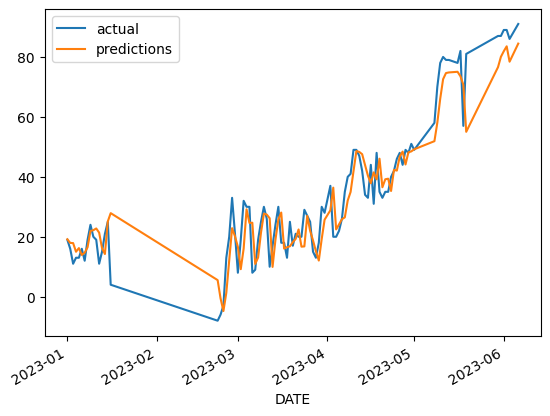

In [223]:
combined.plot()

In [238]:
main_weather["monthly_avg"] = main_weather["temp_max"].groupby(main_weather.index.month, group_keys=False).apply(lambda x: x.expanding(1).mean())
main_weather["day_of_year_avg"] = main_weather["temp_max"].groupby(main_weather.index.day_of_year, group_keys=False).apply(lambda x: x.expanding(1).mean())

In [239]:
error, combined = create_predictions(factors + ["monthly_avg", "day_of_year_avg"], main_weather, reg)
error

5.760540738570792

<AxesSubplot:xlabel='DATE'>

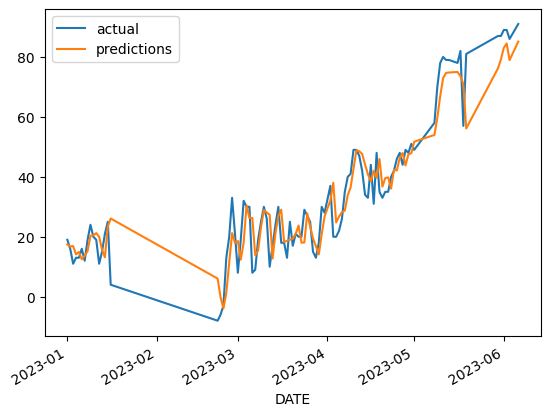

In [240]:
combined.plot()

In [241]:
reg.coef_

array([-9.7947071 ,  0.44497815,  0.36035884,  0.07188539,  0.14860032,
       -0.19126575,  0.14754283,  0.01038995])

In [242]:
main_weather.corr()["forecast_temp max"]

precip               0.052064
temp_max             0.937694
temp_min             0.926092
forecast_temp max    1.000000
target_temp max      1.000000
month_max            0.863835
month_day_max        0.117163
min_max             -0.010887
max_min             -0.010887
monthly_avg          0.900406
day_of_year_avg      0.922788
month_day_max1       0.117163
max_min1            -0.010848
Name: forecast_temp max, dtype: float64

In [243]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [244]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2023-05-19,81.0,56.141156,24.858844
2023-01-16,4.0,26.091636,22.091636
2023-03-06,8.0,26.287215,18.287215
2023-04-03,20.0,38.030825,18.030825
2023-03-12,10.0,27.346807,17.346807
2023-02-22,-8.0,6.053907,14.053907
2023-05-18,57.0,71.022399,14.022399
2023-03-03,32.0,18.039398,13.960602
2023-02-27,33.0,21.222201,11.777799
